In [2]:
#Activate the environment
#conda activate python_course

#Import Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns


# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset["train"].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States') ].copy()

#Drop NaN values from the column for plotting
df_DA_US =  df_DA_US.dropna(subset=['salary_year_avg'])

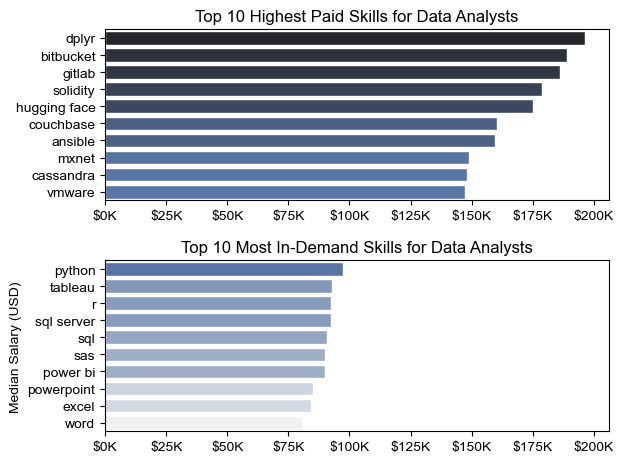

In [5]:
df_DA_US = df_DA_US.explode('job_skills')

# Grafico para os top skills  e para os skills mais comuns na amostra com respectivos salarios medianos
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False)
df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_DA_skills = df_DA_skills.head(10).sort_values(by='median',ascending=False)

fig, ax = plt.subplots(2,1)

sns.set_theme(style='ticks')

#Top 10 Highest Paid Skills for Data Analysts
#df_DA_top_pay[::-1].plot(kind='barh',y='median', ax = ax[0], legend = False)
sns.barplot(data = df_DA_top_pay, x = 'median', y = df_DA_top_pay.index, ax = ax[0], hue = 'median', palette='dark:b_r')
ax[0].legend().remove()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

#Top 10 Most In-Demand Skills for Data Analysts
#df_DA_skills[::-1].plot(kind='barh',y='median', ax = ax[1], legend = False)
sns.barplot(data = df_DA_skills, x = 'median', y = df_DA_skills.index, ax = ax[1], hue = 'median', palette = 'light:b')
ax[1].legend().remove()
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_xlabel('')
ax[1].set_ylabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())    # Set the same x-axis limit as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()



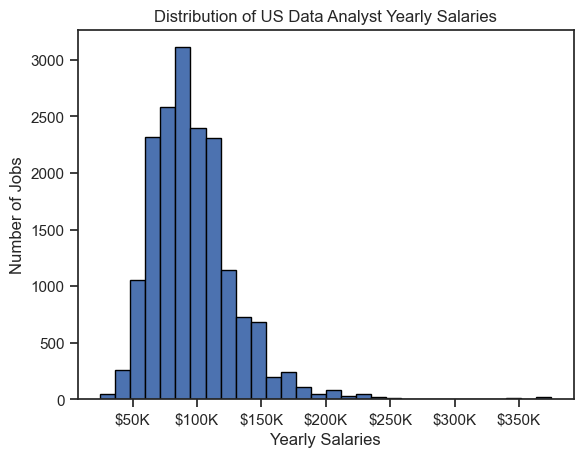

In [6]:
# Reformatando o grafico de histograma

df_DA_US['salary_year_avg'].plot(kind='hist',bins=30,edgecolor = 'black')

plt.title('Distribution of US Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salaries')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))   # FuncFormatter
plt.show()


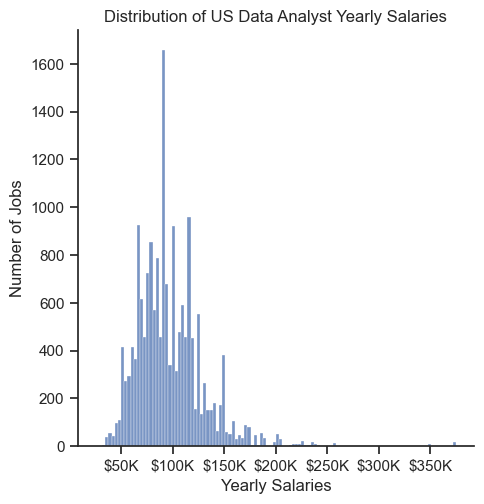

In [8]:

sns.displot(df_DA_US['salary_year_avg'], kind='hist', fill = True)
plt.title('Distribution of US Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salaries')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))   # FuncFormatter
plt.show()


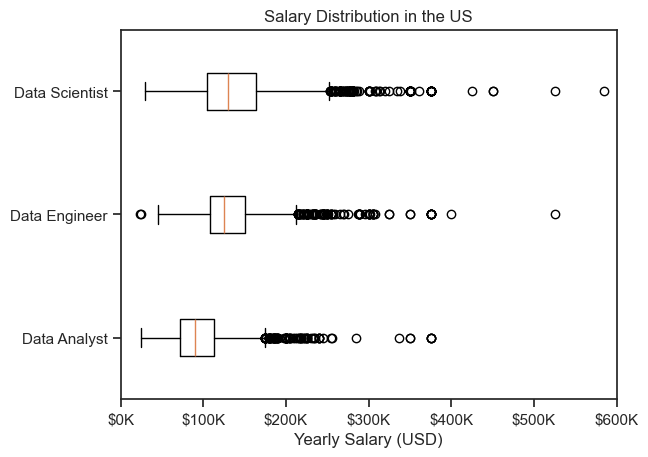

In [9]:
# Box Plots
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

#filter for the job_titles and country
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

#list of salaries for each job title
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the US')
plt.xlabel('Yearly Salary (USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))   # FuncFormatter
plt.xlim(0,600000)
plt.show()

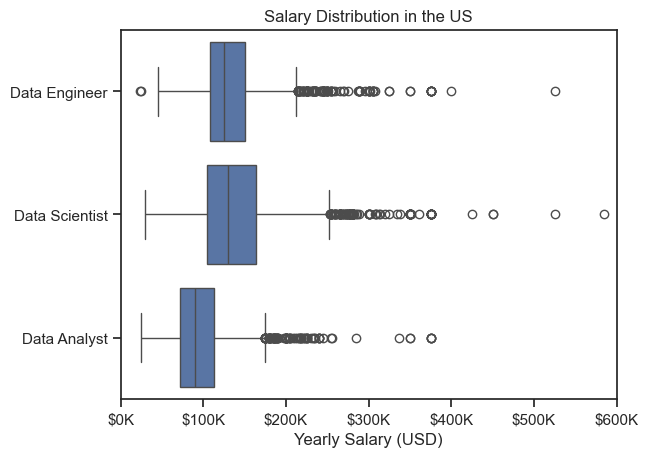

In [10]:
sns.boxplot(data = df_US, x = 'salary_year_avg', y = 'job_title_short')

plt.title('Salary Distribution in the US')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))   # FuncFormatter
plt.xlim(0,600000)
plt.show()